In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os, sys
from PIL import Image

from keras import layers

In [2]:
path = "../data_new/1_crop/00012.jpg"

img = Image.open(path)
image_array  = tf.keras.utils.img_to_array(img)
#image_cast = tf.cast(tf.expand_dims(image_array, 0), tf.float32)

In [6]:
random_flip = tf.keras.Sequential([layers.RandomFlip("horizontal_and_vertical"),layers.RandomRotation(0.2),])

random_contrast = tf.keras.Sequential([layers.RandomContrast(0.6),])

crop_height = (150,175)
crop_width = (150,175)

random_crop = tf.keras.Sequential([layers.RandomCrop(150,250)])
# positive float between 0 and 1 -> zooming out
# negative float between 0 and 1 -> zooming in
# (a,b) -> a defines lowest zoom level, b highest zoom level
zoom_height = (0.5,0.6)
zoom_width = (0.5,0.6)

random_zoom = tf.keras.Sequential([layers.RandomZoom(zoom_height, zoom_width)])
random_flip = tf.keras.Sequential([layers.RandomFlip(mode='horizontal', seed=None)])

random_flipped_array = random_flip(image_array)
random_contrast_array = random_contrast(image_array)
random_crop_array = random_crop(image_array)
random_zoom_array = random_zoom(image_array)
# random__array = random_flip(image_array)
# random_flipped_array = random_flip(image_array)

In [7]:
original_im = tf.keras.utils.array_to_img(image_array)
flipped_im = tf.keras.utils.array_to_img(random_flipped_array)
contrast_im = tf.keras.utils.array_to_img(random_contrast_array)
zoomed_im = tf.keras.utils.array_to_img(random_zoom_array)


[None, None, None, None, None, None, None, None, None]

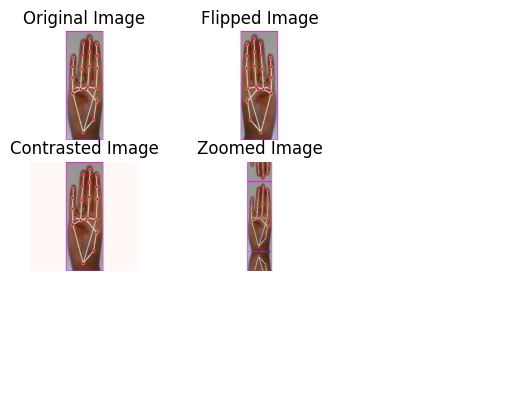

In [9]:
fig, ax = plt.subplots(3,3)
ax[0,0].imshow(original_im)
ax[0,0].set_title("Original Image")
ax[0,1].imshow(flipped_im)
ax[0,1].set_title("Flipped Image")
ax[1,0].imshow(contrast_im)
ax[1,0].set_title("Contrasted Image")
ax[1,1].imshow(zoomed_im)
ax[1,1].set_title("Zoomed Image")

ax[2,0].imshow(all_flipped_image)
ax[2,0].set_title("Flipped Image")
ax[0,2].imshow(noise_image)
ax[0,2].set_title("Pepper Noise")
ax[1,2].imshow(flipped_noise)
ax[1,2].set_title("Flipped & Pepper Noise")
ax[2,2].imshow(inverted_noise)
ax[2,2].set_title("Inverted & Pepper Noise")
[axi.set_axis_off() for axi in ax.ravel()]

## Drehen -> preview

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

img = load_img(path)
x  = img_to_array(img)
x = x.reshape((1,)+ x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='preview',save_prefix='hand', save_format='jpeg'):
    i += 1
    if i > 10:
        break

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='constant', cval=125
)

img = load_img(path)